# Logistic Regression on Titanic dataset


- In this we use titanic data set to predict no. of survivals from titanic 

In [2]:
import numpy as np
import pandas as pd
# mathematical depencies

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("ggplot")

#visualiztion dependencies


In [4]:
# loading the dataset
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


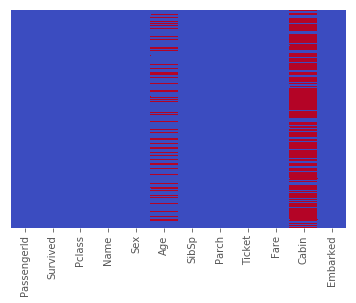

In [18]:
# checking for the missing values
sns.heatmap(df.isnull(), cbar=False, yticklabels = False , cmap='coolwarm')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [22]:
df.describe()

# quick Statistical summery

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


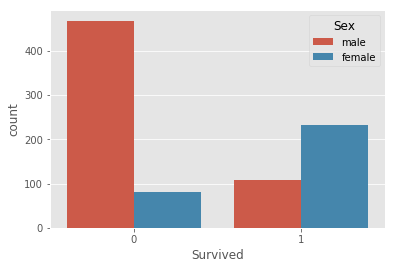

In [26]:
# ploting the survival rate
sns.countplot(x = 'Survived', data = df, hue = 'Sex')

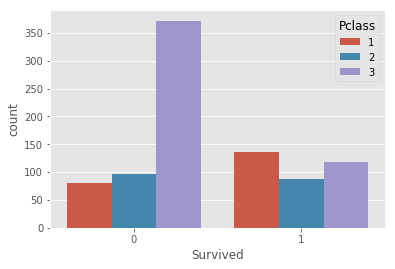

In [27]:
sns.countplot(x = 'Survived', data = df, hue = 'Pclass')

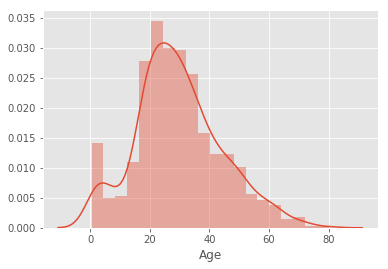

In [29]:
sns.distplot(df['Age'].dropna())
# distribution of age

### Feature Engineering

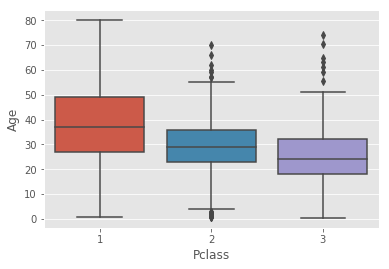

In [31]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df)

In [35]:
# filling the age

def fill_age(cols):
    Age, Pclass = cols
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        
        elif Pclass ==2:
            return 29
        else:
            return 23
            
    else :
        return Age

In [36]:
df["Age"] = df[['Age', 'Pclass']].apply(fill_age, axis = 1)

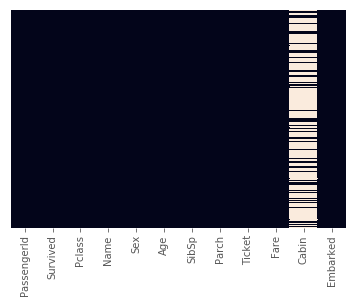

In [37]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [41]:
# there are too many null's in Cabin it is better to drop it

df.drop('Cabin', inplace = True, axis=1)

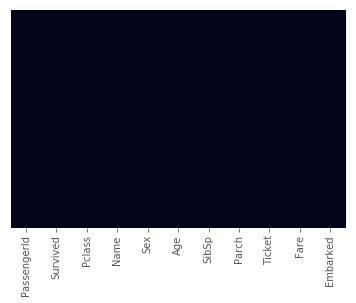

In [42]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [44]:
# droping na just in a case
df.dropna(inplace = True)

## dummy varibales for catogorical 

In [48]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [52]:
embark = pd.get_dummies(df['Embarked'], drop_first = True )
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [53]:
df = pd.concat([df, sex, embark], axis = 1)

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [55]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [60]:
df.drop(['Sex', 'Ticket', 'Embarked', 'Name'], axis= 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [61]:
df.drop(['PassengerId'],axis= 1, inplace=True)

In [62]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Logistic

In [63]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [64]:
from sklearn.cross_validation import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logistic = LogisticRegression()

In [68]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
predictions = logistic.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
print(classification_report(y_test, predictions))

# our prediction has pretty good precision

             precision    recall  f1-score   support

          0       0.74      0.88      0.80       122
          1       0.81      0.63      0.71       101

avg / total       0.77      0.77      0.76       223



In [73]:
print(confusion_matrix(y_test, predictions))

[[107  15]
 [ 37  64]]
